Support Vector Machine

In [1]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
from itertools import product

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, 
from sklearn import metrics

%matplotlib inline
style.use('ggplot')

In [75]:
#Creating Dummy Data

from sklearn.datasets.samples_generator import make_blobs

def fcnCreateDatasets(intSamples, intFeatures):
    X, y = make_blobs(n_samples = intSamples, centers = 2, n_features = intFeatures, cluster_std = 2, random_state = 15)
    return X, y

In [112]:
def fcnLinearSVM(X, Y):
    
    y = np.where(Y == 0, -1, 1)
    yUniqueClass, yCountForEachUnqiueClass = np.unique(y, return_counts=True)
    intNumberOfSamples, intNumberOfFeatures = X.shape
    intNumberOfClass = len(yUniqueClass)
    
    #{|w| = [w,b]}
    dictWeights = {}
    lstTransform = list(map(list, list(product(yUniqueClass, repeat = intNumberOfClass))))  
    
    intHighestFeatureValue = np.amax(X)
    intLowestFeatureValue = np.amin(X)
    intScale = 10
    
    lstStepSizes = [intHighestFeatureValue*0.1, intHighestFeatureValue*0.01, intHighestFeatureValue*0.001]
    intInitialBias = 2
    intInitialWeight = intHighestFeatureValue * intScale
    intStepBias = 2
    
    for intStep in lstStepSizes:
        WeightVector = np.array([intInitialWeight] * intNumberOfFeatures)
        blnOptimized = False
        while not blnOptimized:
            for intBiasIterator in np.arange(-1*intHighestFeatureValue*intInitialBias, intHighestFeatureValue*intInitialBias, intStep*intStepBias):
                for lstTransformations in lstTransform:
                    TransformedWeightVector = WeightVector * lstTransformations
                    blnCorrectClassification = True
                    for intIndex, xi in enumerate(X):
                        yi = y[intIndex]
                        if not yi*(np.dot(TransformedWeightVector, xi) + intBiasIterator) >= 1:
                            blnCorrectClassification = False
                            break
                    if blnCorrectClassification:
                        dictWeights[np.linalg.norm(TransformedWeightVector)] = [TransformedWeightVector, intBiasIterator]
            if WeightVector[0] < 0:
                blnOptimized = True
            else:
                WeightVector = WeightVector - intStep
        
        if dictWeights:
            lstSortedWeightKeys = sorted([item for item in dictWeights])
            lstOptimizedParameters = dictWeights[lstSortedWeightKeys[0]]
            Weight = lstOptimizedParameters[0]
            Bias = lstOptimizedParameters[1]
            intInitialWeight = Weight[0] + intStep * intScale
        else:
            intInitialWeight = WeightVector[0] + intStep * intScale

    return Weight, Bias    


def fcnPrediction(X_test, Weight, Bias):
    yPrediction = np.zeros(x_test.shape[0], dtype = int )
    for intIndex, Sample in enumerate(X_test):
        intClass = np.sign(np.dot(np.array(Sample), Weight) + Bias)
        if intClass == 1:
            yPrediction[intIndex] = 1
    return yPrediction

def fcnCalculateAccuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [76]:
#Generating Dataset

x, y = fcnCreateDatasets(100, 2)
intMaxX = np.amax(x)
intMinX = np.amin(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [113]:
Weight, Bias = fcnLinearSVM(x_train, y_train)

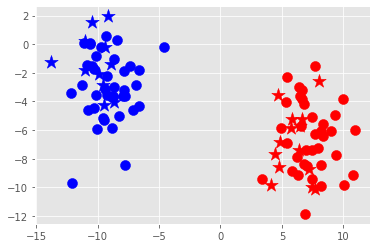

In [77]:
fcnDatasetVisualization(x_train, y_train, x_test, y_test)

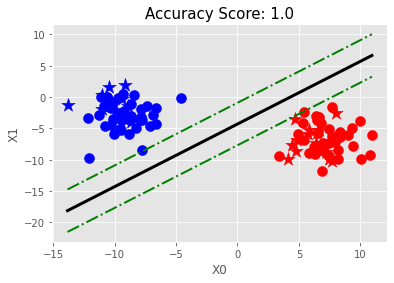

In [114]:
yPred = fcnPrediction(x_test, Weight, Bias)
accuracy = fcnCalculateAccuracy(yPred, y_test)
fcnVisualization(x_train, y_train, x_test, yPred, Weight, Bias, intMaxX, intMinX)

In [56]:
#Visualization of the 2-D Linear Dataset

def fcnDatasetVisualization(X, y, X_test, y_pred):    

    dictcolors = {0: 'r', 1: 'b'}
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
        
    [ax.scatter(X[i][0], X[i][1], s=100, c=dictcolors[y[i]]) for i in range(X.shape[0])]
    [ax.scatter(X_test[j][0], X_test[j][1], s=200, marker='*', c=dictcolors[y_pred[j]]) for j in range(X_test.shape[0])]    
    plt.show()

def fcnVisualization(X, y, X_test, y_pred, w, b, intXMax, intXMin):    

    dictcolors = {0: 'r', 1: 'b'}
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
        
    [ax.scatter(X[i][0], X[i][1], s=100, c=dictcolors[y[i]]) for i in range(X.shape[0])]
    [ax.scatter(X_test[j][0], X_test[j][1], s=200, marker='*', c=dictcolors[y_pred[j]]) for j in range(X_test.shape[0])]    
    
    def hyperplane(x, w, b, v):
        return (-w[0] * x - b + v) / w[1]
    
    datarange = (intXMin, intXMax)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]
    
    psv1 = hyperplane(hyp_x_min, w, b, 1)
    psv2 = hyperplane(hyp_x_max, w, b, 1)
    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'g-.', linewidth=2)
    
    nsv1 = hyperplane(hyp_x_min, w, b, -1)
    nsv2 = hyperplane(hyp_x_max, w, b, -1)
    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'g-.', linewidth=2)
    
    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)
    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'k-', linewidth=3)
    
    plt.ylabel('X1');
    plt.xlabel('X0');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15);

    
    plt.show()

In [80]:
LinearSVMClassfier = SVC()
LinearSVMClassfier.fit(x_train, y_train)
y_predicted = LinearSVMClassfier.predict(x_test)
metrics.accuracy_score(y_test, y_predicted)

1.0

In [93]:
from sklearn.svm import LinearSVC

LinearSVMClassfier = LinearSVC()
LinearSVMClassfier.fit(x_train, y_train)
y_predicted = LinearSVMClassfier.predict(x_test)
metrics.accuracy_score(y_test, y_predicted)

1.0